In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

X=df.iloc[:,:-1]
X_test=df_test.iloc[:,:]
Y=df.iloc[:,-1]

In [2]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X=imp.fit_transform(X)
col=X_test.columns
X=pd.DataFrame(X,columns=col)

In [3]:
X_test=imp.transform(X_test)
X_test=pd.DataFrame(X_test,columns=col)

In [4]:
cat=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration']
num=[i for i in X.columns if i not in cat]

In [5]:
X1=X.loc[:,cat]
X2=X.loc[:,num]

X1_test=X_test.loc[:,cat]
X2_test=X_test.loc[:,num]

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X1=X1.apply(le.fit_transform)

In [8]:
X1_test=X1_test.apply(LabelEncoder().fit_transform)

In [9]:
X=pd.concat([X1,X2],axis=1)

In [10]:
X_test=pd.concat([X1_test,X2_test],axis=1)

In [11]:
X.head()

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,22,1,0,0,0,5,1,3213,36,36,3,22,11628
1,31,0,1,0,1,0,2,1117,75,22,3,22,30510
2,31,0,0,0,0,0,3,3732,32,32,1,19,7450
3,16,0,1,0,0,5,4,4378,52,48,3,19,17780
4,34,1,0,0,1,8,5,2190,44,44,1,16,10404


In [12]:
X=X.drop(['Upper_Age'],axis=1)

In [13]:
X_test=X_test.drop(['Upper_Age'],axis=1)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0,min_samples_leaf=10,max_depth = 10)

In [55]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=0)

In [56]:
X_train.columns

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'ID', 'Region_Code',
       'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium'],
      dtype='object')

In [57]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='Clf.dot',feature_names=X_train.columns)

In [20]:
from graphviz import Source

In [21]:
from sklearn import tree

In [24]:
graph=Source(export_graphviz(clf,out_file=None,feature_names=X_train.columns))

In [28]:
png_bytes=graph.pipe(format='dot')

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tdot'], make sure the Graphviz executables are on your systems' PATH

[Text(122.73045413201663, 207.55636363636364, 'X[10] <= 4.5\ngini = 0.363\nsamples = 40705\nvalue = [31015, 9690]'),
 Text(25.568957900207902, 187.7890909090909, 'X[10] <= 1.5\ngini = 0.163\nsamples = 4770\nvalue = [4343, 427]'),
 Text(5.046361746361747, 168.0218181818182, 'X[0] <= 0.5\ngini = 0.01\nsamples = 1562\nvalue = [1554, 8]'),
 Text(4.350311850311851, 148.25454545454545, 'gini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(5.742411642411643, 148.25454545454545, 'X[4] <= 6.5\ngini = 0.008\nsamples = 1543\nvalue = [1537, 6]'),
 Text(5.046361746361747, 128.48727272727274, 'X[11] <= 14547.0\ngini = 0.007\nsamples = 1531\nvalue = [1526, 5]'),
 Text(4.350311850311851, 108.72, 'gini = 0.0\nsamples = 994\nvalue = [994, 0]'),
 Text(5.742411642411643, 108.72, 'X[11] <= 14681.0\ngini = 0.018\nsamples = 537\nvalue = [532, 5]'),
 Text(5.046361746361747, 88.95272727272729, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(6.438461538461539, 88.95272727272729, 'X[6] <= 48984.0\ngini = 0.0

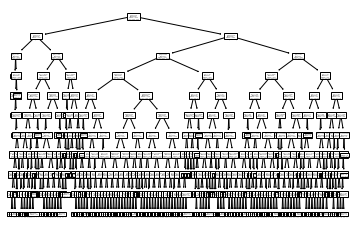

In [37]:
tree.plot_tree(clf)